In [35]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
%matplotlib inline

In [3]:
file_path = "data/2015_Air_quality_in_northern_Taiwan.csv"
df = pd.read_csv(file_path, parse_dates=["time"],index_col="time")
df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PH_RAIN,PM10,PM2.5,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
time,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,Banqiao,16,2.1,0.79,0.14,1.2,16,17,37,NR,177,78x,NR,NR,57,12,2.2,0,69,69,4.7,4.2
2015-01-01 01:00:00,Banqiao,16,2.1,0.8,0.15,1.3,16,17,36,NR,178,77x,NR,NR,57,11,2.2,0,67,65,4,4
2015-01-01 02:00:00,Banqiao,16,2.1,0.71,0.13,1,13,14,38,NR,163,72x,NR,NR,57,8,2.2,0,63,53,3.7,3.5
2015-01-01 03:00:00,Banqiao,15,2,0.66,0.12,0.8,11,12,39,NR,147,65x,NR,NR,58,6.5,2.2,0,63,63,4.1,3.3
2015-01-01 04:00:00,Banqiao,15,2,0.53,0.11,0.6,10,11,38,NR,131,56x,NR,NR,58,5.5,2.1,0,69,67,3,3.1


In [4]:
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: pd.to_numeric(x,errors='coerce'),axis=1).copy()

In [5]:
df.station.unique()

array(['Banqiao', 'Cailiao', 'Datong', 'Dayuan', 'Guanyin', 'Guting',
       'Keelung', 'Linkou', 'Longtan', 'Pingzhen', 'Sanchong', 'Shilin',
       'Songshan', 'Tamsui', 'Taoyuan', 'Tucheng', 'Wanhua', 'Wanli',
       'Xindian', 'Xinzhuang', 'Xizhi', 'Yangming', 'Yonghe', 'Zhongli',
       'Zhongshan'], dtype=object)

In [6]:
#Drops unneeded rain metric
#df = df.drop('PH_RAIN','PM10','PM2.5','RAINFALL',1)
df = df.drop(df.columns[[9, 10, 11, 12, 13]], axis=1)

In [64]:
#len(subset)
pol = "CO"
# stations = ['Xinzhuang', 'Sanchong', 'Linkou', 'Wanhua']
stations = ["Guanyin", "Dayuan", "Linkou",  "Sanchong", "Zhongshan", "Songshan"]
subset = df[["station", pol]]
subset = subset.pivot(columns="station", values=pol).fillna(method='ffill')
subset = subset[stations]
subset.shape

(8760, 6)

In [65]:
model = sm.tsa.VAR(subset)
order = model.select_order(30)["aic"]

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -14.88       -14.88    3.434e-07       -14.88
1        -21.64       -21.61    3.998e-10       -21.63
2        -22.04       -21.97    2.686e-10       -22.02
3        -22.07       -21.98    2.599e-10       -22.04
4        -22.16      -22.04*    2.371e-10       -22.12
5        -22.18       -22.03    2.329e-10       -22.13
6        -22.19       -22.01    2.301e-10       -22.13
7        -22.21       -22.00    2.259e-10       -22.14
8        -22.22       -21.99    2.231e-10       -22.14
9        -22.25       -21.98    2.171e-10       -22.16
10       -22.25       -21.96    2.164e-10       -22.15
11       -22.27       -21.94    2.140e-10       -22.15
12       -22.28       -21.92    2.118e-10       -22.15
13       -22.28       -21.90    2.099e-10       -22.15
14       -22.30       -21.89    2.058e-10       -22.16
15       -

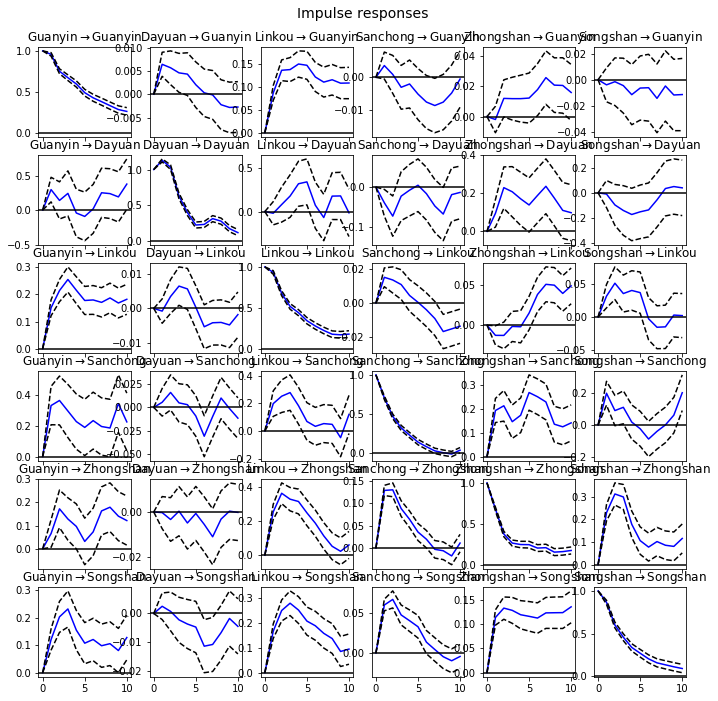

In [66]:
results = model.fit(order)
irf = results.irf(10)
irf.plot(orth=False)

Initial LogLikelihood 

In [ ]:
def find_var_params(df, metric):
    """
    This function will select var_p stuff
    """
    models = {}
    for i in df.Binned_Wind.unique():
        df_i = df.loc[df.Binned_Wind == 1]
        df_i = df_i[['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3',]]
        model = sm.tsa.VAR(df_i)
        order = model.select_order(30)[metric]
        models[i] = model.fit(order)

    return models

In [ ]:
train = Taoyuan.iloc[:int(Taoyuan.shape[0] / 2), :]
test = Taoyuan.iloc[int(Taoyuan.shape[0] / 2):, :]
find_var_params(train, "aic")